<a href="https://colab.research.google.com/github/riswan29/MinPro/blob/main/Image_Classification_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi gambar fashion (mnist) menggunakan CNN

Mengelompokan Data Gambar menggunakan Algoritma CNN

In [ ]:
#Load library yang dibutuhkan

# TensorFlow and tf.keras library yang digunakan untuk Computer Vision dan Deep Learning
import tensorflow as tf

# Helper libraries, numpy untuk mengolah matrik, matplotlib untuk visualisasi data
import numpy as np
import matplotlib.pyplot as plt


## Import the Fashion MNIST dataset

Dataset Fashion terdiri dari 70.000 gambar yang dibagi menjadi 60.000 data latih dan 10.000 data uji. Sampel dataset terdiri dari citra grayscale 28x28, dan memiliki label dari 10 kelas.

10 kelas tersebut yaitu:
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 7 => Sneaker 
8 => Bag 
9 => Ankle boot

Setiap gambar memiliki resolusi 28x28 (tinggi 28 piksel dan lebar 28 piksel), dengan total 784 piksel. Setiap piksel memiliki nilai piksel tunggal yang terkait dengannya, yang menunjukkan terang atau gelapnya piksel tersebut, dengan angka yang lebih tinggi berarti lebih gelap. Nilai piksel ini adalah bilangan bulat antara 0 dan 255.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


Anda dapat mengakses dataset Fashion MNIST secara langsung dari TensorFlow. (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data). Berikut cara memasukan dataset yang kita ambil dari TensorFlow :

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Mmebuat dataset menjadi 4 Array Numpy:

*  `train_images` dan `train_labels` arrays adalah *training set*—data yang digunakan AI/Model belajar.
* Model/AI akan ditest menggunakan data *test set*, yaitu `test_images`, and `test_labels` arrays.

Ukuran Gambar adalah 28x28 NumPy arrays, Dengan rentan pixel dari 0 sampai 255. *labels* adalah array dengan typedata integers/angka, rentan dari 0 sampai 9. Kumpulan *class* dari gambar fashion direpresentasikan seperti berikut :

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Masing-masing kelas dipetakan pada satu label. Karena *class names* tidak terdapat pada dataset, maka perlu untuk mendeskripsikan label dengan masing-masing nama kelas / *class names* seperti berikut :

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data Eksplorasi

Mari kita eksplor jumlah data pada data latih.  ( 60000 = jumlah data gambar  dan masing-masing gambar memiliki ukuran 28 x 28 pixels )

In [ ]:
train_images.shape

(60000, 28, 28)

Untuk mengetahui ada berapa banyak label pada data latih adalah sebagai berikut :

In [ ]:
len(train_labels)

60000

Mencari tahu labelnya ada apa saja (Label terdiri dari type data interger antara 0 - 9 )

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Mencari tahu ada berapa banyak jumlah data uji (Ada 10.000 gambar dengan ukuran 28 x 28 pixelstiap gambarnya.)

In [ ]:
test_images.shape

(10000, 28, 28)

Dan data Uji sebanyak 10.000 gambar tadi memiliki 10.000 data label

In [ ]:
len(test_labels)

10000

## Preprocess the data

Data harus di preproses sebelum digunakan untuk melatih AI. Jika kalian perhatikan gambar awal pada data latih, Kalian dapat mengetahui jika tiap pixel pada gambar memiliki nilai antara 0 to 255:

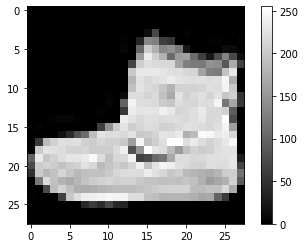

In [ ]:
plt.figure()
plt.imshow(train_images[0],cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

Kita akan ubah skala nilai pixel menjadi  0 sampai 1 sebelum memproses data tersebut menggunakan algoritma neural network. Makadari itu,  kita bagi masing-masing pixel dengan 255. Proses ini sangat penting untuk diterapkan pada data gambar yaitu  *training set* dan *testing set* :

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Mari kita lihat beberapa hasil gambar yang sudah dilakukan normalisasi beserta labelnya.

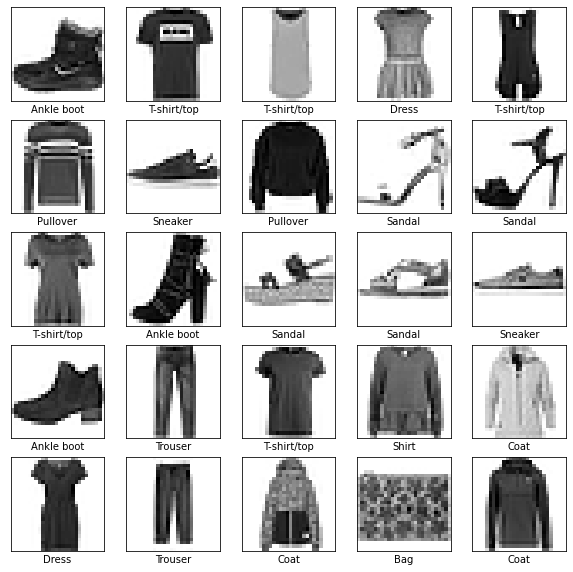

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# **4. Modelling dengan CNN**

Penambahan yang dilakukan :

- Membagi dataset menjadi tiga bagian training dataset, validation dataset dan testing dataset 
- Menambahkan Convolution layer, MaxPooling dan Fully connected layer

## Split data menjadi train/validation/test

In [ ]:
# Untuk data train awal, split data sebesar 5000 untuk data validasi, dan sisanya untuk data train
(train_images, valid_images) = train_images[5000:], train_images[:5000] 
(train_labels, valid_labels) = train_labels[5000:], train_labels[:5000]

# Melakukan reshape data untuk memastikan gambar berukuran (28,28,1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
valid_images = valid_images.reshape(valid_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# Convert data label kedalam bentuk one-hot 
train_labels= tf.keras.utils.to_categorical(train_labels, 10)
valid_labels = tf.keras.utils.to_categorical(valid_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

#print data
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)
print(train_images.shape[0], 'train set')
print(valid_images.shape[0], 'validation set')
print(test_images.shape[0], 'test set')

train_images shape: (55000, 28, 28, 1) train_labels shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Membangun model

### Membangun layers

In [ ]:
# Arsitektur CNN dengan 2 Convolution Layers
model = tf.keras.Sequential()

# Convolution layer pertama
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', 
                                 activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolution layer kedua
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Flattern 
model.add(tf.keras.layers.Flatten())
# Fully connected layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 256)               4

### Compile model

Sebelum melakukan training, lakukan compile model terlebih dahulu dengan tujuan menginisialisasi jenis loss function, optimizer dan metrics yang akan digunakan.

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Latih model

Lakukan training terhadap model yang sudah dibuat


In [ ]:
model.fit(train_images,
         train_labels,
         batch_size=32,
         epochs=10,
         validation_data=(valid_images, valid_labels))

Epoch 1/10
1719/1719 [==============================] - 19s 4ms/step - loss: 0.4359 - accuracy: 0.8422 - val_loss: 0.3076 - val_accuracy: 0.8864
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2905 - accuracy: 0.8938 - val_loss: 0.2845 - val_accuracy: 0.8932
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2454 - accuracy: 0.9109 - val_loss: 0.2479 - val_accuracy: 0.9048
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2134 - accuracy: 0.9207 - val_loss: 0.2354 - val_accuracy: 0.9142
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1865 - accuracy: 0.9303 - val_loss: 0.2269 - val_accuracy: 0.9166
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1625 - accuracy: 0.9398 - val_loss: 0.2269 - val_accuracy: 0.9188
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1422 - accuracy: 0.9472 - val_loss: 0.2173 - val_accuracy

# Evaluasi Model

Lakukan pengujian terhadap data test

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9157999753952026


Saving baju.jpg to baju (2).jpg
Ini adalah :  Bag


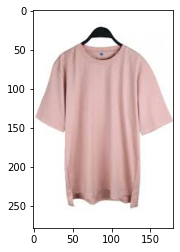

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
import cv2
labels = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag","Ankle Boot"]
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(28, 28),color_mode="grayscale")
  img2 = image.load_img(path)
  x = image.img_to_array(img)
  x2 = image.img_to_array(img2)
  plt.imshow(x2/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(x)
  print("Ini adalah : ",labels[np.argmax(classes)])
  # print(classes)
